<H1>Dataset Loading and Interaction Extraction</h1>

In [173]:
class Sentence:
    def __init__(self):
        self.text = ""
        self.proteins = []
        self.interactions = []
        self.reconstructedText = ""
        self.words = []
        self.valid = False

    def show(self):
        print(self.text)
        print(self.proteins)
        if len(self.interactions):
            for i in self.interactions:
                print(i)
        print()
        
        
    def processText(self):
        #self.text = self.text.replace("_/_","_ _")
        #self.text = self.text.replace("_:_","_ _")
        #self.text = self.text.replace("_-_","_ _")
        self.text = re.sub("(\_[^_]_)", "_ _", self.text)#regexp to remove things like _:_
        self.text = self.text.replace("(_","_")
        self.text = self.text.replace("_)","_")
    
    def checkValidity(self):
        count = 0
        for w in range(len(self.words)):
            if "__" in self.words[w]:
                count = count +1
        
        if count == len(self.proteins):
            self.valid = True
            #print(self.valid)
        
    
    def reconstructText(self):
        self.words = self.text.split(" ")
        self.checkValidity()
        #print(self.words)
        if self.valid:
            p=0
            for w in range(len(self.words)):
                if "__" in self.words[w]:
                    self.words[w] = self.proteins[p]
                    #self.words[w] = "PROTEIN"+str(p)
                    p=p+1
            #print(self.words)
            #print()
        
    def reassembleSentence(self):
        print(" ".join(self.words))
        
    def fullProcess(self):
        self.processText()
        self.reconstructText()
        

In [174]:
import pickle

with open('datasetTrain.pkl', 'rb') as input1:
    trainSetRaw = pickle.load(input1)
    
with open('datasetTest.pkl', 'rb') as input2:    
    testSetRaw = pickle.load(input2)
    
try:
    print(len(trainSetRaw))
    print(len(testSetRaw))
except NameError:
    print("nope")   

2245
529


In [175]:
def findMaxWords(inputList):
    maxwords = -1 
    for i in inputList:
        if len(i.words)>maxwords:
            maxwords = len(i.words)
    print(maxwords)
    

In [176]:
findMaxWords(trainSetRaw)
findMaxWords(testSetRaw)

93
74


<h1>Maximum Words In Sentence</h1>

We start out with
2245 training examples
529 test examples

mean 24.980894015861573
std 10.856406734698178
80 words: 2770
70 words: 2766
60 words: 2751
50 words: 2697
48 words: 2674
40 words: 2544
30 words: 2086

Selecting for under 48 words we are left with
2186 training examples
511 test examples


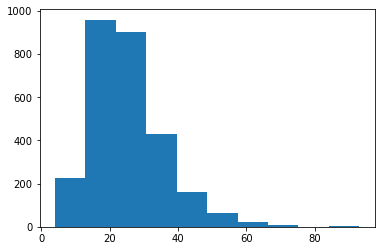

In [177]:
print("We start out with")

print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

print()

allSet = [len(x.words) for x in trainSetRaw+testSetRaw]

from matplotlib import pyplot as plt 
import numpy as np  

print("mean",np.mean(allSet))

print("std",np.std(allSet))

plt.hist(allSet)



selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=80 ]

print("80 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=70 ]

print("70 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=60 ]

print("60 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=50 ]

print("50 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=48 ]

print("48 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=40 ]

print("40 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=30 ]

print("30 words:",len(selectedSet))


#HERE
maxSentenceWords = 50

trainSetRaw = [x for x in trainSetRaw if len(x.words)<=maxSentenceWords]
testSetRaw = [x for x in testSetRaw if len(x.words)<=maxSentenceWords]


print()
print("Selecting for under 48 words we are left with")
print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

In [178]:
print(trainSetRaw[0])
print()

print(trainSetRaw[0].text)
print()

print(trainSetRaw[0].words)
print()

print(trainSetRaw[0].proteins)



print(len('protein0'))


Cytokines measurements during _________ treatment showed a trend to decreasing levels of ____ at 4, 12, and 24 weeks.

['Cytokines', 'measurements', 'during', 'PROTEIN0', 'treatment', 'showed', 'a', 'trend', 'to', 'decreasing', 'levels', 'of', 'PROTEIN1', 'at', '4,', '12,', 'and', '24', 'weeks.']

['PROTEIN0', 'PROTEIN1']
8


In [179]:
import string
string.ascii_letters

import random
random.choice(string.ascii_letters)

def genRandomWord():
    word = ''
    for letter in range(random.randint(3,9)):
        word+=random.choice(string.ascii_letters)
        
    return word
        

for i,v in enumerate(range(10)):
    print(i,genRandomWord())

0 QCu
1 juGwJC
2 gpO
3 fQNFdh
4 CsFNZQ
5 NjeBkF
6 GzvPmlP
7 Okrs
8 ywExfJf
9 bEcv


In [180]:
import re

re.sub('PROTEIN[0-9]',genRandomWord(),'PROTEINA PROTEIN1 PROTEIN2 is a sentence')




'PROTEINA qNEfOx qNEfOx is a sentence'

In [181]:
proteins = ["Actin","Albumins","Alpha globulin","Arp2/3","Beta globulin","C-myc","C-reactive protein","C1-inhibitor","C3-convertase","CFTR","Cadherin","Calcium channels","Carboxypeptidase","Collagen","Coronin","Dystrphin","Elastin","Ependymin","Estrogen receptor","F-spondin","FOXP2","FOXP3","Factor VIII","Factor XIII","Ferritin","Fibrin","Fibronectin","Gamma globulin","Glucose transporter","Glycophorin D","GroEL ","Hemoglobin","Histones","Hydrolases","IgA","IgD","IgE","IgG","IgM","Insulin","Integrin","Keratin","Muscarinic acetylcholine receptor","MyoD","Myoglobin","Myosin","NCAM","Nebulin","Nicotinic acetylcholine receptor","Oxidoreductases","Oxytocin","P53","Pikachurin","Potassium channels","Protein C","Protein S","Protein Z","Protein Z-related protease inhibitor","Rhodopsin","Scramblase","Selectin","Serum Amyloid P Component","Serum albumin","Sodium channels","Spectrin","Tau","Thrombin","Titin","Transferases","Tropomyosin","Tubulin","Von Willebrand Factor"]

import random

def genRandomProtein():
    return random.choice(proteins)
        

for i,v in enumerate(range(10)):
    print(i,genRandomProtein())

0 Factor XIII
1 Myoglobin
2 Arp2/3
3 Calcium channels
4 Albumins
5 Serum Amyloid P Component
6 C1-inhibitor
7 Fibronectin
8 Fibronectin
9 Protein Z-related protease inhibitor


In [182]:
for i in range(10):
    print('PROTEIN'+str(i))

PROTEIN0
PROTEIN1
PROTEIN2
PROTEIN3
PROTEIN4
PROTEIN5
PROTEIN6
PROTEIN7
PROTEIN8
PROTEIN9


In [183]:
trainSet = []
trainLabel = []

for example in trainSetRaw:
    #print(example.words)
    for interaction in example.interactions:
        sentence =" ".join(example.words)
        
        #print(sentence)
        #print()
        
        if interaction[2] == "True":
            trainLabel = trainLabel + [1]
            #print("HIT")
        else:
            trainLabel = trainLabel + [0]
            #print("MISS")
        
        sentence = sentence.replace(interaction[0],'PROTEINA')
        sentence = sentence.replace(interaction[1],'PROTEINB')
        for i in range(10):
            sentence = sentence.replace('PROTEIN'+str(i),genRandomProtein())
        #sentence = re.sub('PROTEIN[0-9]',genRandomWord(),sentence)
        
        #print(sentence)
        #print()
        #print()
        
        trainSet = trainSet + [sentence]    
            
    #print()
    
    
print(len(trainSet))
print(len(trainLabel))

10394
10394


In [184]:
testSet = []
testLabel = []

for example in testSetRaw:
    #print(example.words)
    for interaction in example.interactions:
        sentence =" ".join(example.words)
        
        #print(sentence)
        #print()
        
        if interaction[2] == "True":
            testLabel = testLabel + [1]
            #print("HIT")
        else:
            testLabel = testLabel + [0]
            #print("MISS")
        
        sentence = sentence.replace(interaction[0],'PROTEINA')
        sentence = sentence.replace(interaction[1],'PROTEINB')
        for i in range(10):
            sentence = sentence.replace('PROTEIN'+str(i),genRandomProtein())
        
        #print(sentence)
        #print()
        #print()
        
        testSet = testSet + [sentence]    
            
    #print()
    
    
print(len(testSet))
print(len(testLabel))

2336
2336


In [185]:
for t in trainSet:
    print(t)
    print()

Cytokines measurements during PROTEINA treatment showed a trend to decreasing levels of PROTEINB at 4, 12, and 24 weeks.

Levels of PROTEINA were slightly increased following PROTEINB treatment (P = 0.09).

This study describes the distributions of PROTEINA as well as mRNAs for PROTEINB Estrogen receptor collagen types II Transferases and III GroEL  in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for Serum albumin PROTEINB collagen types II Gamma globulin and III Tau in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for Carboxypeptidase Protein Z-related protease inhibitor collagen types II PROTEINB and III Fibronectin in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for Arp2/3 IgA collagen types II Protein Z and III PROTEINB in a growing "cartilage cap" of osteochondroma.

This study 


This transcriptional activity is inhibited by association with the Keratin Coronin or its relatives PROTEINA and PROTEINB

The first cDNA from the PROTEINA family to be cloned was designated PROTEINB and multiple Spectrin family members have now been identified.

The first cDNA from the PROTEINA family to be cloned was designated Integrin and multiple PROTEINB family members have now been identified.

The first cDNA from the Serum Amyloid P Component family to be cloned was designated PROTEINA and multiple PROTEINB family members have now been identified.

Here we demonstrate that DP is also a family of polypeptides with at least two members PROTEINA and PROTEINB

Both PROTEINA and PROTEINB bind to all GroEL  family members in vivo, and each complex is capable of activating transcription.

Both PROTEINA and Alpha globulin bind to all PROTEINB family members in vivo, and each complex is capable of activating transcription.

Both Collagen and PROTEINA bind to all PROTEINB family members

We have therefore investigated whether the octamer binding proteins might physically interact with PROTEINA the PROTEINB component of the Factor VIII factor.

We have therefore investigated whether the octamer binding proteins might physically interact with PROTEINA the Protein C component of the PROTEINB factor.

We have therefore investigated whether the octamer binding proteins might physically interact with Factor VIII the PROTEINA component of the PROTEINB factor.

By using several different experimental systems we show that PROTEINA efficiently associates with PROTEINB and IgD

By using several different experimental systems we show that PROTEINA efficiently associates with FOXP3 and PROTEINB

By using several different experimental systems we show that Sodium channels efficiently associates with PROTEINA and PROTEINB

We show that the POU homeodomain of PROTEINA and the evolutionarily conserved C-terminal core domain of PROTEINB are both required and sufficient for the interacti


The similarities in biofunctions and differences in ligand binding proteins between PROTEINA and PROTEINB prompted us to investigate whether Protein S shares common signal transduction mechanisms with Keratin

The similarities in biofunctions and differences in ligand binding proteins between PROTEINA and C-reactive protein prompted us to investigate whether PROTEINB shares common signal transduction mechanisms with Rhodopsin

The similarities in biofunctions and differences in ligand binding proteins between PROTEINA and Coronin prompted us to investigate whether Tau shares common signal transduction mechanisms with PROTEINB

The similarities in biofunctions and differences in ligand binding proteins between Protein C and PROTEINA prompted us to investigate whether PROTEINB shares common signal transduction mechanisms with Factor VIII

The similarities in biofunctions and differences in ligand binding proteins between Serum Amyloid P Component and PROTEINA prompted us to investigate 


Since Thrombin and PROTEINA do not readily associate on their own, it appears that Ferritin is the central organizing component of an PROTEINB Serum Amyloid P Component IgA complex.

Since C-myc and PROTEINA do not readily associate on their own, it appears that NCAM is the central organizing component of an Alpha globulin PROTEINB Tau complex.

Since Myoglobin and PROTEINA do not readily associate on their own, it appears that MyoD is the central organizing component of an FOXP2 IgD PROTEINB complex.

Since Serum albumin and Nebulin do not readily associate on their own, it appears that PROTEINA is the central organizing component of an PROTEINB C-reactive protein Nicotinic acetylcholine receptor complex.

Since Alpha globulin and Factor VIII do not readily associate on their own, it appears that PROTEINA is the central organizing component of an Myoglobin PROTEINB Alpha globulin complex.

Since Rhodopsin and Fibronectin do not readily associate on their own, it appears that PROTEINA

PROTEINA was associated with alpha 3 beta 1 but not alpha 5 beta 1; small amounts of PROTEINB also co-immunoprecipitated with antibodies to alpha 2 beta 1 and alpha 6 beta 4.

Antibodies to PROTEINA did not affect the proportion of keratinocytes that adhered to PROTEINB Glycophorin D and Elastin but did inhibit motility of keratinocytes on tissue culture plastic.

Antibodies to PROTEINA did not affect the proportion of keratinocytes that adhered to Beta globulin PROTEINB and Estrogen receptor but did inhibit motility of keratinocytes on tissue culture plastic.

Antibodies to PROTEINA did not affect the proportion of keratinocytes that adhered to C-myc Thrombin and PROTEINB but did inhibit motility of keratinocytes on tissue culture plastic.

Antibodies to P53 did not affect the proportion of keratinocytes that adhered to PROTEINA PROTEINB and P53 but did inhibit motility of keratinocytes on tissue culture plastic.

Antibodies to Gamma globulin did not affect the proportion of keratinoc

However, in cell lines with defined combinations of ErbBs, PROTEINA only activates those with Myosin and/or PROTEINB suggesting that signalling by Cadherin is mediated by Factor XIII and/or Tau receptors.

However, in cell lines with defined combinations of ErbBs, PROTEINA only activates those with Sodium channels and/or MyoD suggesting that signalling by PROTEINB is mediated by Selectin and/or C-reactive protein receptors.

However, in cell lines with defined combinations of ErbBs, PROTEINA only activates those with Pikachurin and/or Carboxypeptidase suggesting that signalling by C3-convertase is mediated by PROTEINB and/or Serum Amyloid P Component receptors.

However, in cell lines with defined combinations of ErbBs, PROTEINA only activates those with NCAM and/or IgG suggesting that signalling by Tubulin is mediated by Protein C and/or PROTEINB receptors.

However, in cell lines with defined combinations of ErbBs, Tubulin only activates those with PROTEINA and/or PROTEINB suggesting


How PROTEINA promotes PROTEINB filament assembly in the presence of Insulin

How PROTEINA promotes Ependymin filament assembly in the presence of PROTEINB

How Gamma globulin promotes PROTEINA filament assembly in the presence of PROTEINB

The role of PROTEINA in the regulation of PROTEINB assembly has been reexamined.

When barbed ends are capped, PROTEINA simply sequesters globular PROTEINB

PROTEINA binds PROTEINB likely to promote Nebulin polymerization.

PROTEINA binds Gamma globulin likely to promote PROTEINB polymerization.

Protein Z-related protease inhibitor binds PROTEINA likely to promote PROTEINB polymerization.

PROTEINA plays a fundamental role in mispair recognition whereas PROTEINB and C1-inhibitor appear to modify the specificity of this recognition.

PROTEINA plays a fundamental role in mispair recognition whereas Oxidoreductases and PROTEINB appear to modify the specificity of this recognition.

Keratin plays a fundamental role in mispair recognition whereas PROTEI


Bistratene A causes phosphorylation of PROTEINA and redistribution of PROTEINB microfilaments in fibroblasts: possible role for Protein Z

Bistratene A causes phosphorylation of PROTEINA and redistribution of Myoglobin microfilaments in fibroblasts: possible role for PROTEINB

Bistratene A causes phosphorylation of Dystrphin and redistribution of PROTEINA microfilaments in fibroblasts: possible role for PROTEINB

PROTEINA appears to be more closely related to the mouse PROTEINB gene and other similar eukaryotic Potassium channels homologues than to the yeast gene Alpha globulin and other Cadherin homologues that are involved in replication repair.

PROTEINA appears to be more closely related to the mouse Nicotinic acetylcholine receptor gene and other similar eukaryotic PROTEINB homologues than to the yeast gene Nicotinic acetylcholine receptor and other Myosin homologues that are involved in replication repair.

PROTEINA appears to be more closely related to the mouse Hydrolases gene

PROTEINA links PROTEINB to the IgG cytoskeleton.

PROTEINA links Pikachurin to the PROTEINB cytoskeleton.

Tubulin links PROTEINA to the PROTEINB cytoskeleton.

Calorimetric data show ternary complex formation between PROTEINA PROTEINB and Protein Z

Calorimetric data show ternary complex formation between PROTEINA Collagen and PROTEINB

Calorimetric data show ternary complex formation between Protein S PROTEINA and PROTEINB

PROTEINA activity in vivo was determined by observing proteolysis of PROTEINB and Collagen two known substrates of Hydrolases

PROTEINA activity in vivo was determined by observing proteolysis of Thrombin and PROTEINB two known substrates of Myoglobin

PROTEINA activity in vivo was determined by observing proteolysis of Tropomyosin and Nebulin two known substrates of PROTEINB

Myoglobin activity in vivo was determined by observing proteolysis of PROTEINA and PROTEINB two known substrates of IgG

Titin activity in vivo was determined by observing proteolysis of PRO


Finally, we evaluated the acetylation of three putative Ependymin substrates, Von Willebrand Factor GroEL  and Insulin and the transcription factor PROTEINA and have determined that C-myc PROTEINB is significantly preferred over the Glycophorin D Arp2/3 and Hemoglobin substrates.

Finally, we evaluated the acetylation of three putative Pikachurin substrates, Albumins Nicotinic acetylcholine receptor and Collagen and the transcription factor PROTEINA and have determined that Coronin IgA is significantly preferred over the PROTEINB Ependymin and Protein C substrates.

Finally, we evaluated the acetylation of three putative IgG substrates, Spectrin Fibronectin and Fibronectin and the transcription factor PROTEINA and have determined that Spectrin Hydrolases is significantly preferred over the Gamma globulin PROTEINB and Thrombin substrates.

Finally, we evaluated the acetylation of three putative Sodium channels substrates, Estrogen receptor Tropomyosin and Serum Amyloid P Component and 

However, a number of mammalian DNA repair proteins lack NLS clusters; these proteins include PROTEINA IgA Muscarinic acetylcholine receptor mouse Spectrin and the IgM F-spondin and PROTEINB subunits of Fibrin

However, a number of mammalian DNA repair proteins lack NLS clusters; these proteins include PROTEINA Transferases Thrombin mouse Integrin and the Scramblase Beta globulin and Insulin subunits of PROTEINB

However, a number of mammalian DNA repair proteins lack NLS clusters; these proteins include Protein Z-related protease inhibitor PROTEINA PROTEINB mouse Collagen and the Ependymin Fibrin and IgE subunits of Von Willebrand Factor

However, a number of mammalian DNA repair proteins lack NLS clusters; these proteins include Oxidoreductases PROTEINA P53 mouse PROTEINB and the GroEL  Oxytocin and Oxidoreductases subunits of Hemoglobin

However, a number of mammalian DNA repair proteins lack NLS clusters; these proteins include Arp2/3 PROTEINA Rhodopsin mouse Estrogen receptor and t

Hypertonicity provoked PROTEINA tyrosine phosphorylation in PROTEINB NCAM and Rhodopsin Ependymin and caused the dissociation of Protein Z-related protease inhibitor from the contacts.

Hypertonicity provoked PROTEINA tyrosine phosphorylation in Thrombin PROTEINB and C1-inhibitor F-spondin and caused the dissociation of MyoD from the contacts.

Hypertonicity provoked PROTEINA tyrosine phosphorylation in Spectrin CFTR and PROTEINB Myosin and caused the dissociation of CFTR from the contacts.

Hypertonicity provoked PROTEINA tyrosine phosphorylation in Collagen C-myc and Glycophorin D PROTEINB and caused the dissociation of Coronin from the contacts.

Hypertonicity provoked PROTEINA tyrosine phosphorylation in Protein Z-related protease inhibitor Cadherin and Protein Z-related protease inhibitor Alpha globulin and caused the dissociation of PROTEINB from the contacts.

Hypertonicity provoked Cadherin tyrosine phosphorylation in PROTEINA PROTEINB and Hemoglobin Collagen and caused the dis


In this study, by immunoprecipitation and affinity chromatography it is shown that PROTEINA and PROTEINB interact in pig brain cortical membranes.

In this study, the expressions of smooth muscle-specific proteins PROTEINA PROTEINB Protein Z-related protease inhibitor and the Factor XIII isoforms of Histones and Calcium channels in three parent and four cloned neuroblastoma cell lines, composed of S-type cells, were examined by indirect immunofluorescence, Western blot and/or by reverse Titin chain reaction (RT-PCR).

In this study, the expressions of smooth muscle-specific proteins PROTEINA Albumins PROTEINB and the Titin isoforms of Beta globulin and Factor XIII in three parent and four cloned neuroblastoma cell lines, composed of S-type cells, were examined by indirect immunofluorescence, Western blot and/or by reverse Rhodopsin chain reaction (RT-PCR).

In this study, the expressions of smooth muscle-specific proteins PROTEINA Selectin Muscarinic acetylcholine receptor and the PRO


Moreover, PROTEINA but not Protein C or PROTEINB appears to co-localize with IgE microfilaments in the membrane ruffles of NK cells that undergo cytoskeleton rearrangement following Hemoglobin cross-linking.

Moreover, PROTEINA but not Factor XIII or Albumins appears to co-localize with PROTEINB microfilaments in the membrane ruffles of NK cells that undergo cytoskeleton rearrangement following Tubulin cross-linking.

Moreover, PROTEINA but not Albumins or Glucose transporter appears to co-localize with Nebulin microfilaments in the membrane ruffles of NK cells that undergo cytoskeleton rearrangement following PROTEINB cross-linking.

Moreover, FOXP3 but not PROTEINA or PROTEINB appears to co-localize with CFTR microfilaments in the membrane ruffles of NK cells that undergo cytoskeleton rearrangement following Glucose transporter cross-linking.

Moreover, Nebulin but not PROTEINA or C1-inhibitor appears to co-localize with PROTEINB microfilaments in the membrane ruffles of NK cells th

No significant changes in glomerular PROTEINA PROTEINB C1-inhibitor or total Estrogen receptor expression occurred at any time point during disease development.

No significant changes in glomerular PROTEINA Protein Z-related protease inhibitor PROTEINB or total Potassium channels expression occurred at any time point during disease development.

No significant changes in glomerular PROTEINA FOXP2 P53 or total PROTEINB expression occurred at any time point during disease development.

No significant changes in glomerular Scramblase PROTEINA PROTEINB or total Fibronectin expression occurred at any time point during disease development.

No significant changes in glomerular NCAM PROTEINA Hemoglobin or total PROTEINB expression occurred at any time point during disease development.

No significant changes in glomerular Oxytocin Scramblase PROTEINA or total PROTEINB expression occurred at any time point during disease development.

Notably, the two pro-apoptotic adapter proteins PROTEINA a

Titin inhibition also led to the formation of less prominent focal adhesions as revealed by immunofluorescence staining against PROTEINA IgA and PROTEINB

Tropomyosin inhibition also led to the formation of less prominent focal adhesions as revealed by immunofluorescence staining against NCAM PROTEINA and PROTEINB

PROTEINA PROTEINB is a F-spondin highly expressed in testicular germ cells and has the potential to phosphorylate Glucose transporter and induce Tau cytoskeletal reorganization.

PROTEINA FOXP3 is a PROTEINB highly expressed in testicular germ cells and has the potential to phosphorylate Selectin and induce IgD cytoskeletal reorganization.

PROTEINA Actin is a FOXP3 highly expressed in testicular germ cells and has the potential to phosphorylate PROTEINB and induce Tropomyosin cytoskeletal reorganization.

PROTEINA Collagen is a IgM highly expressed in testicular germ cells and has the potential to phosphorylate Histones and induce PROTEINB cytoskeletal reorganization.

Acti

The most striking difference was in the relative preference for acetylation of Transferases PROTEINA versus acetylation of Serum albumin C-myc with the purified Hydrolases Muscarinic acetylcholine receptor PROTEINB in nucleosomes was acetylated to a much greater extent than was Protein Z Albumins whereas the reverse preference was found with the endogenous Muscarinic acetylcholine receptor

The most striking difference was in the relative preference for acetylation of NCAM PROTEINA versus acetylation of Myosin Tau with the purified Albumins Factor XIII Protein Z in nucleosomes was acetylated to a much greater extent than was PROTEINB Beta globulin whereas the reverse preference was found with the endogenous IgE

The most striking difference was in the relative preference for acetylation of Hydrolases PROTEINA versus acetylation of Ferritin P53 with the purified Potassium channels Serum Amyloid P Component Spectrin in nucleosomes was acetylated to a much greater extent than was Tubulin 


The neoplastic cells were positive for Rhodopsin Albumins PROTEINA and Serum Amyloid P Component but negative for Collagen IgM IgE NCAM Tubulin PROTEINB and Rhodopsin protein.

The neoplastic cells were positive for PROTEINB IgD PROTEINA and Thrombin but negative for Cadherin Elastin Muscarinic acetylcholine receptor Titin Muscarinic acetylcholine receptor Beta globulin and PROTEINB protein.

The neoplastic cells were positive for Myosin Keratin Calcium channels and PROTEINA but negative for PROTEINB Arp2/3 Coronin C3-convertase MyoD Oxytocin and Myosin protein.

The neoplastic cells were positive for Tropomyosin Selectin Dystrphin and PROTEINA but negative for Transferases PROTEINB Histones F-spondin C1-inhibitor FOXP3 and Tropomyosin protein.

The neoplastic cells were positive for Cadherin C3-convertase Serum albumin and PROTEINA but negative for MyoD C-reactive protein PROTEINB Selectin Estrogen receptor Spectrin and Cadherin protein.

The neoplastic cells were positive for Fibrin

We previously showed that PROTEINA is transported in an unassembled form with its associated proteins Muscarinic acetylcholine receptor PROTEINB and Glycophorin D

We previously showed that PROTEINA is transported in an unassembled form with its associated proteins Von Willebrand Factor Gamma globulin and PROTEINB

We previously showed that Carboxypeptidase is transported in an unassembled form with its associated proteins PROTEINA PROTEINB and Elastin

We previously showed that Nicotinic acetylcholine receptor is transported in an unassembled form with its associated proteins PROTEINA Serum albumin and PROTEINB

We previously showed that Integrin is transported in an unassembled form with its associated proteins Dystrphin PROTEINA and PROTEINB

We show that the HSV-1 PROTEINA PROTEINB Rhodopsin Glucose transporter Keratin and Oxidoreductases gene products along with the AAV Selectin protein are sufficient to initiate replication on duplex DNA containing the AAV origins of replication,

Myosin and Scramblase are scaffolding proteins acting downstream of cell surface receptors and interact with a variety of cytoplasmic signaling proteins such as PROTEINA PROTEINB Carboxypeptidase Shc, and Crk

NCAM and Factor XIII are scaffolding proteins acting downstream of cell surface receptors and interact with a variety of cytoplasmic signaling proteins such as PROTEINA IgD PROTEINB Shc, and Crk

Carboxypeptidase and Alpha globulin are scaffolding proteins acting downstream of cell surface receptors and interact with a variety of cytoplasmic signaling proteins such as IgA PROTEINA PROTEINB Shc, and Crk

In addition, PROTEINA contains several classic proline-rich motifs, and it interacts with the first SH3 domain of Crk and full-length PROTEINB in vitro

We propose that PROTEINA and PROTEINB in cooperation with other adapter molecules might regulate the cellular localization of Von Willebrand Factor under specific stimuli, acting to regulate precisely Rac and Fibronectin activitie

PROTEINA Protein Z-related protease inhibitor interacts with FOXP3 PROTEINB and SRrp130 in corneal epithelial cells

NCAM PROTEINA interacts with PROTEINB NCAM and SRrp130 in corneal epithelial cells

Glycophorin D PROTEINA interacts with Factor XIII PROTEINB and SRrp130 in corneal epithelial cells

Thrombin Pikachurin interacts with PROTEINA PROTEINB and SRrp130 in corneal epithelial cells

Three SR-rich proteins were identified that interact with the C-terminus of Pnn: PROTEINA and PROTEINB known components of spliceosome machinery, and a novel 130-kDa nuclear protein, SRrp130

Modification of de novo DNA methyltransferase 3a PROTEINA by PROTEINB modulates its interaction with histone deacetylases (HDACs) and its capacity to repress transcription

Here we show that PROTEINA interacts with multiple components of the sumoylation machinery, namely the E2 sumo conjugating enzyme PROTEINB and the E3 sumo ligases Calcium channels and Muscarinic acetylcholine receptor all of which are invol

In contrast, secretion of PROTEINA remains unaffected by the inactive PDBu analog alphaPDD and by the PROTEINB effectors dibutyryl cAMP and forskolin

Overall, our data indicate that the normal processing of PROTEINA is up-regulated by PROTEINB but not Collagen in human cells and murine neurons

Overall, our data indicate that the normal processing of PROTEINA is up-regulated by Fibrin but not PROTEINB in human cells and murine neurons

Overall, our data indicate that the normal processing of Thrombin is up-regulated by PROTEINA but not PROTEINB in human cells and murine neurons

Dietary intakes of PROTEINA PROTEINB and IgM by Japanese women and the inverse correlation between quercetin intake and plasma LDL IgM concentration

Dietary intakes of PROTEINA CFTR and PROTEINB by Japanese women and the inverse correlation between quercetin intake and plasma LDL C-reactive protein concentration

Dietary intakes of PROTEINA IgM and CFTR by Japanese women and the inverse correlation between qu

In [186]:
print(len(trainSet))
print(len(testSet))

uniqueTrain = set()
uniqueTest = set()


uniqueTrain.update(trainSet)
uniqueTest.update(testSet)


print(len(uniqueTrain),len(uniqueTest))

10394
2336
10393 2336


<H1>Imports</h1>

In [187]:
import os
import re
import gc
import time
import numpy as np
import tensorflow as tf
import pandas as pd
from numpy import array
from numpy import asarray
from numpy import zeros

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import backend


from keras import regularizers

from keras.models import Sequential, Model

from keras.layers import Input
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Reshape
from keras.layers import MaxPooling1D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling1D
from keras.layers import GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Lambda
from keras.layers.merge import concatenate


from keras.layers.advanced_activations import LeakyReLU

from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from keras.optimizers import SGD, Adam, RMSprop


import gensim

import gensim.models.keyedvectors as word2vec



print("Imports work")

Imports work


<h1>Embedding</h1>

In [188]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(trainSet)
list_tokenized_train = tokenizer.texts_to_sequences(trainSet)
list_tokenized_test = tokenizer.texts_to_sequences(testSet)

maxlen = maxSentenceWords
padded_training_docs = pad_sequences(list_tokenized_train, maxlen=maxlen)
padded_test_docs = pad_sequences(list_tokenized_test, maxlen=maxlen)

print(type(padded_training_docs))

print(padded_training_docs.shape)


print(type(padded_test_docs))

print(padded_test_docs.shape)


<class 'numpy.ndarray'>
(10394, 50)
<class 'numpy.ndarray'>
(2336, 50)


<h1>Local Embedding</h1>

In [189]:
localVocab = [x.split(' ') for x in trainSet ]


representation = gensim.models.Word2Vec(localVocab, min_count=1,size= 200,workers=3, window =5, sg = 1)

print(type(representation))
print(type(representation.wv))

<class 'gensim.models.word2vec.Word2Vec'>
<class 'gensim.models.keyedvectors.Word2VecKeyedVectors'>


In [190]:



def loadEmbeddingMatrix(typeToLoad):
        #load different embedding file from Kaggle depending on which embedding 
        #matrix we are going to experiment with
        if(typeToLoad=="glove"):
            #EMBEDDING_FILE='../input/glove-twitter/glove.twitter.27B.25d.txt'
            EMBEDDING_FILE='glove.6B.300d.txt'
            #EMBEDDING_FILE='glove.840B.300d.txt'
            embed_size = 300#must be same as above
        elif(typeToLoad=="word2vec"):
            word2vecDict = word2vec.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)
            embed_size = 300
        elif(typeToLoad=="word2vecMed"):
            word2vecDict = word2vec.KeyedVectors.load_word2vec_format("wikipedia-pubmed-and-PMC-w2v.bin", binary=True)
            embed_size = 200
            word2vecDict.add("PROTEINA",representation.wv.get_vector("PROTEINA"))
            word2vecDict.add("PROTEINB",representation.wv.get_vector("PROTEINB"))
        elif(typeToLoad=="fasttext"):
            EMBEDDING_FILE='wiki-news-300d-1M.vec'
            embed_size = 300

        if(typeToLoad=="glove" or typeToLoad=="fasttext" ):
            embeddings_index = dict()
            #Transfer the embedding weights into a dictionary by iterating through every line of the file.
            f = open(EMBEDDING_FILE,encoding="utf8")
            for line in f:
                #split up line into an indexed array
                values = line.split()                 
                #first index is word
                word = values[0]
                #store the rest of the values in the array as a new array
                coefs = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = coefs #50 dimensions
            f.close()
            print('Loaded %s word vectors.' % len(embeddings_index))
        else:
            embeddings_index = dict()
            for word in word2vecDict.wv.vocab:
                embeddings_index[word] = word2vecDict.word_vec(word)
            print('Loaded %s word vectors.' % len(embeddings_index))
            
        gc.collect()
        #We get the mean and standard deviation of the embedding weights so that we could maintain the 
        #same statistics for the rest of our own random generated weights. 
        
        
        '''
        counter = 0 
        for key,value in embeddings_index.items():
            
            #print(type(value))
            #print(value.shape)
            #print(value.shape[0])
            
            if value.shape!=(300,):
                print(value.shape)
                print()
        '''
        #Line to exclude wordvectors that aren't the right size
        embeddings_index = {key:value for key,value in embeddings_index.items() if value.shape==(embed_size,)}
        
        all_embs = np.stack(list(embeddings_index.values()))
        emb_mean,emb_std = all_embs.mean(), all_embs.std()
        
        nb_words = len(tokenizer.word_index)
        #We are going to set the embedding size to the pretrained dimension as we are replicating it.
        #the size will be Number of Words in Vocab X Embedding Size
        embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
        gc.collect()

        #With the newly created embedding matrix, we'll fill it up with the words that we have in both 
        #our own dictionary and loaded pretrained embedding. 
        embeddedCount = 0
        for word, i in tokenizer.word_index.items():
            i-=1
            #then we see if this word is in glove's dictionary, if yes, get the corresponding weights
            embedding_vector = embeddings_index.get(word)
            #and store inside the embedding matrix that we will train later on.
            if embedding_vector is not None: 
                embedding_matrix[i] = embedding_vector
                embeddedCount+=1
        print('total embedded:',embeddedCount,'common words')
        
        del(embeddings_index)
        gc.collect()
        
        #finally, return the embedding matrix
        return embedding_matrix

     
print()
print('word2vec')
#embedding_matrix_word2vec = loadEmbeddingMatrix('word2vec')
#del embedding_matrix_word2vec

print()
print('word2vecMed')
#embedding_matrix_word2vecMed = loadEmbeddingMatrix('word2vecMed')
#del embedding_matrix_word2vecMed

print()
print('glove')    
#embedding_matrix_glove = loadEmbeddingMatrix('glove')
#del embedding_matrix_glove

print()
print('fasttext')
#embedding_matrix_fasttext = loadEmbeddingMatrix('fasttext')
#del embedding_matrix_fasttext







#inp = Input(shape=(maxlen, )) #maxlen=200 as defined earlier

#x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)




word2vec

word2vecMed

glove

fasttext


<h1>Functional API</h1>

In [191]:

denseResults = []
CNNResults = []
LSTMResults = []

all_epochs_to_run  = 20
opt = 'adam'
learningRate = 1


lossType = 'binary_crossentropy'#"sparse_categorical_crossentropy" #"categorical_crossentropy" #'binary_crossentropy'

<h4>word2vec</h4>

In [192]:
embedding_matrix = loadEmbeddingMatrix('word2vec')

vocab_size = len(tokenizer.word_index)
sentence_length = maxSentenceWords
wordvec_length = embedding_matrix.shape[1]


epochs_to_run = all_epochs_to_run
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


Loaded 3000000 word vectors.
total embedded: 4169 common words


In [193]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 2000)          602000    
_________________________________________________________________
dense_2 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_4 (Dense)              (None, 50, 200)           100200    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 50)            1005

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 6s 564us/step - loss: 0.6018 - accuracy: 0.7108
Epoch 3/20
10394/10394 [==============================] - 6s 567us/step - loss: 0.5797 - accuracy: 0.7120
Epoch 4/20
10394/10394 [==============================] - 6s 567us/step - loss: 0.5541 - accuracy: 0.7269
Epoch 5/20
10394/10394 [==============================] - 6s 571us/step - loss: 0.5355 - accuracy: 0.7424
Epoch 6/20
10394/10394 [==============================] - 6s 568us/step - loss: 0.5285 - accuracy: 0.7504
Epoch 7/20
10394/10394 [==============================] - 6s 569us/step - loss: 0.5215 - accuracy: 0.7548
Epoch 8/20
10394/10394 [==============================] - 6s 571us/step - loss: 0.5162 - accuracy: 0.7593
Epoch 9/20
10394/10394 [==============================] - 6s 570us/step - loss: 0.5161 - accuracy: 0.7590
Epoch 10/20
10394/10394 [==============================] - 6s 570us/step - loss: 0.5099 - accuracy: 0.7572
Epoch 11/20
10394/10394 [==============================]

In [194]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Reshape((sentence_length, wordvec_length,1))(x)


x = Conv2D (kernel_size = (3,3), strides = 3, filters = 100,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,4), strides = 4, filters = 200,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,8), strides = 8, filters = 400,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)


'''
x = Dense(400, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''


output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))



CNNResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
reshape_1 (Reshape)          (None, 50, 300, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 100, 100)      1000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 100, 100)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 25, 200)        320200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 25, 200)        0   

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 8s 733us/step - loss: 0.6023 - accuracy: 0.7108
Epoch 3/20
10394/10394 [==============================] - 8s 735us/step - loss: 0.6020 - accuracy: 0.7108
Epoch 4/20
10394/10394 [==============================] - 8s 729us/step - loss: 0.6020 - accuracy: 0.7108
Epoch 5/20
10394/10394 [==============================] - 8s 730us/step - loss: 0.6024 - accuracy: 0.7108
Epoch 6/20
10394/10394 [==============================] - 8s 734us/step - loss: 0.6020 - accuracy: 0.7108
Epoch 7/20
10394/10394 [==============================] - 8s 735us/step - loss: 0.6021 - accuracy: 0.7108
Epoch 8/20
10394/10394 [==============================] - 8s 731us/step - loss: 0.6021 - accuracy: 0.7108
Epoch 9/20
10394/10394 [==============================] - 8s 729us/step - loss: 0.6020 - accuracy: 0.7108
Epoch 10/20
10394/10394 [==============================] - 8s 733us/step - loss: 0.6018 - accuracy: 0.71082s - loss: 0.6
Epoch 11/20
10394/10394 [=================

In [195]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        #dropout = 0.3, 
        #recurrent_dropout = 0.3,
        units=200)(x)


'''
x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


LSTMResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               400800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,997,601
Trainable params: 1,997,601
Non-trainable params: 0
_________________________________________________________________

Starting training...

Epoch 1/20
10394/10394 [==============================] - 13s 1ms/step - loss: 0.5473 - accuracy: 0.7146
Epoch 2/20
   96/10394 [..............................] - ETA: 12s - loss: 0.4680 - accuracy: 0.750

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 14s 1ms/step - loss: 0.4658 - accuracy: 0.7617
Epoch 3/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.4282 - accuracy: 0.7870
Epoch 4/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.4017 - accuracy: 0.8037
Epoch 5/20
10394/10394 [==============================] - 15s 1ms/step - loss: 0.3735 - accuracy: 0.8176
Epoch 6/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.3543 - accuracy: 0.8277
Epoch 7/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.3282 - accuracy: 0.8407
Epoch 8/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.3087 - accuracy: 0.8534
Epoch 9/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.2808 - accuracy: 0.8670
Epoch 10/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.2592 - accuracy: 0.8777
Epoch 11/20
10394/10394 [==============================] - 14s 1m

<h4>word2vecMed</h4>

In [196]:
embedding_matrix = loadEmbeddingMatrix('word2vecMed')

vocab_size = len(tokenizer.word_index)
sentence_length = maxSentenceWords
wordvec_length = embedding_matrix.shape[1]


epochs_to_run = all_epochs_to_run
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


Loaded 5443658 word vectors.
total embedded: 5070 common words


In [197]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 200)           1064400   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 2000)          402000    
_________________________________________________________________
dense_2 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_4 (Dense)              (None, 50, 200)           100200    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 50)            1005

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 6s 530us/step - loss: 0.6034 - accuracy: 0.71080s - loss: 0.6037 - accu
Epoch 3/20
10394/10394 [==============================] - 6s 530us/step - loss: 0.6029 - accuracy: 0.7108
Epoch 4/20
10394/10394 [==============================] - 6s 532us/step - loss: 0.6023 - accuracy: 0.7108
Epoch 5/20
10394/10394 [==============================] - 6s 530us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 6/20
10394/10394 [==============================] - 6s 530us/step - loss: 0.6026 - accuracy: 0.7108
Epoch 7/20
10394/10394 [==============================] - 6s 531us/step - loss: 0.6023 - accuracy: 0.7108
Epoch 8/20
10394/10394 [==============================] - 6s 530us/step - loss: 0.6020 - accuracy: 0.7108
Epoch 9/20
10394/10394 [==============================] - 6s 531us/step - loss: 0.6019 - accuracy: 0.7108
Epoch 10/20
10394/10394 [==============================] - 6s 530us/step - loss: 0.6016 - accuracy: 0.71080s - l
Epoch 11/20
10394/10394 [=

In [198]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Reshape((sentence_length, wordvec_length,1))(x)


x = Conv2D (kernel_size = (3,3), strides = 3, filters = 100,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,4), strides = 4, filters = 200,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,8), strides = 8, filters = 400,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)


'''
x = Dense(400, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''


output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))



CNNResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 200)           1064400   
_________________________________________________________________
reshape_1 (Reshape)          (None, 50, 200, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 66, 100)       1000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 66, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 16, 200)        320200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 16, 200)        0   

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 6s 609us/step - loss: 0.6020 - accuracy: 0.7108
Epoch 3/20
10394/10394 [==============================] - 6s 605us/step - loss: 0.6022 - accuracy: 0.7108
Epoch 4/20
10394/10394 [==============================] - 6s 607us/step - loss: 0.6024 - accuracy: 0.7108
Epoch 5/20
10394/10394 [==============================] - 6s 605us/step - loss: 0.6018 - accuracy: 0.7108
Epoch 6/20
10394/10394 [==============================] - 6s 606us/step - loss: 0.6018 - accuracy: 0.7108
Epoch 7/20
10394/10394 [==============================] - 6s 606us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 8/20
10394/10394 [==============================] - 6s 605us/step - loss: 0.6020 - accuracy: 0.7108
Epoch 9/20
10394/10394 [==============================] - 6s 607us/step - loss: 0.6019 - accuracy: 0.7108
Epoch 10/20
10394/10394 [==============================] - 6s 613us/step - loss: 0.6023 - accuracy: 0.7108
Epoch 11/20
10394/10394 [==============================]

In [199]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        #dropout = 0.3, 
        #recurrent_dropout = 0.3,
        units=200)(x)


'''
x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


LSTMResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 200)           1064400   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,385,401
Trainable params: 1,385,401
Non-trainable params: 0
_________________________________________________________________

Starting training...

Epoch 1/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.5540 - accuracy: 0.7165
Epoch 2/20
   96/10394 [..............................] - ETA: 12s - loss: 0.4206 - accuracy: 0.7708

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 14s 1ms/step - loss: 0.4696 - accuracy: 0.7623
Epoch 3/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.4322 - accuracy: 0.7881
Epoch 4/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.4039 - accuracy: 0.8004
Epoch 5/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.3810 - accuracy: 0.8143
Epoch 6/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.3602 - accuracy: 0.8234
Epoch 7/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.3378 - accuracy: 0.8375
Epoch 8/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.3177 - accuracy: 0.8440
Epoch 9/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.3007 - accuracy: 0.8555
Epoch 10/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.2715 - accuracy: 0.8695
Epoch 11/20
10394/10394 [==============================] - 14s 1m

<h4>glove</h4>

In [200]:
embedding_matrix = loadEmbeddingMatrix('glove')

vocab_size = len(tokenizer.word_index)
sentence_length = maxSentenceWords
wordvec_length = embedding_matrix.shape[1]


epochs_to_run = all_epochs_to_run
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

Loaded 400000 word vectors.
total embedded: 4581 common words


In [201]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 2000)          602000    
_________________________________________________________________
dense_2 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_4 (Dense)              (None, 50, 200)           100200    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 50)            1005

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 6s 586us/step - loss: 0.6024 - accuracy: 0.7108
Epoch 3/20
10394/10394 [==============================] - 6s 586us/step - loss: 0.6030 - accuracy: 0.7108
Epoch 4/20
10394/10394 [==============================] - 6s 578us/step - loss: 0.6025 - accuracy: 0.7108
Epoch 5/20
10394/10394 [==============================] - 6s 584us/step - loss: 0.6029 - accuracy: 0.7108
Epoch 6/20
10394/10394 [==============================] - 6s 579us/step - loss: 0.6023 - accuracy: 0.7108
Epoch 7/20
10394/10394 [==============================] - 6s 576us/step - loss: 0.6018 - accuracy: 0.7108
Epoch 8/20
10394/10394 [==============================] - 6s 575us/step - loss: 0.6025 - accuracy: 0.7108
Epoch 9/20
10394/10394 [==============================] - 6s 575us/step - loss: 0.5984 - accuracy: 0.7108
Epoch 10/20
10394/10394 [==============================] - 6s 578us/step - loss: 0.5853 - accuracy: 0.7108
Epoch 11/20
10394/10394 [==============================]

In [202]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Reshape((sentence_length, wordvec_length,1))(x)


x = Conv2D (kernel_size = (3,3), strides = 3, filters = 100,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,4), strides = 4, filters = 200,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,8), strides = 8, filters = 400,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)


'''
x = Dense(400, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''


output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))



CNNResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
reshape_1 (Reshape)          (None, 50, 300, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 100, 100)      1000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 100, 100)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 25, 200)        320200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 25, 200)        0   

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 8s 746us/step - loss: 0.6037 - accuracy: 0.7108
Epoch 3/20
10394/10394 [==============================] - 8s 744us/step - loss: 0.6022 - accuracy: 0.7108
Epoch 4/20
10394/10394 [==============================] - 8s 770us/step - loss: 0.6020 - accuracy: 0.7108
Epoch 5/20
10394/10394 [==============================] - 8s 754us/step - loss: 0.6020 - accuracy: 0.7108
Epoch 6/20
10394/10394 [==============================] - 8s 797us/step - loss: 0.6023 - accuracy: 0.7108
Epoch 7/20
10394/10394 [==============================] - 8s 740us/step - loss: 0.6019 - accuracy: 0.7108
Epoch 8/20
10394/10394 [==============================] - 8s 730us/step - loss: 0.6024 - accuracy: 0.7108
Epoch 9/20
10394/10394 [==============================] - 8s 731us/step - loss: 0.6020 - accuracy: 0.7108
Epoch 10/20
10394/10394 [==============================] - 8s 732us/step - loss: 0.6020 - accuracy: 0.7108
Epoch 11/20
10394/10394 [==============================]

In [203]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        #dropout = 0.3, 
        #recurrent_dropout = 0.3,
        units=200)(x)


'''
x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


LSTMResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               400800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,997,601
Trainable params: 1,997,601
Non-trainable params: 0
_________________________________________________________________

Starting training...

Epoch 1/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.5586 - accuracy: 0.7100
Epoch 2/20
   96/10394 [..............................] - ETA: 13s - loss: 0.5340 - accuracy: 0.7396

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 14s 1ms/step - loss: 0.4801 - accuracy: 0.7531
Epoch 3/20
10394/10394 [==============================] - 15s 1ms/step - loss: 0.4282 - accuracy: 0.7899
Epoch 4/20
10394/10394 [==============================] - 15s 1ms/step - loss: 0.3901 - accuracy: 0.8098
Epoch 5/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.3549 - accuracy: 0.8282
Epoch 6/20
10394/10394 [==============================] - 15s 1ms/step - loss: 0.3156 - accuracy: 0.8496
Epoch 7/20
10394/10394 [==============================] - 15s 1ms/step - loss: 0.2702 - accuracy: 0.8699
Epoch 8/20
10394/10394 [==============================] - 15s 1ms/step - loss: 0.2273 - accuracy: 0.8919
Epoch 9/20
10394/10394 [==============================] - 15s 1ms/step - loss: 0.1912 - accuracy: 0.9139
Epoch 10/20
10394/10394 [==============================] - 15s 1ms/step - loss: 0.1485 - accuracy: 0.9339
Epoch 11/20
10394/10394 [==============================] - 15s 1m

<h4>fasttext</h4>

In [204]:
embedding_matrix = loadEmbeddingMatrix('word2vec')

vocab_size = len(tokenizer.word_index)
sentence_length = maxSentenceWords
wordvec_length = embedding_matrix.shape[1]


epochs_to_run = all_epochs_to_run
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


Loaded 3000000 word vectors.
total embedded: 4169 common words


In [205]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 2000)          602000    
_________________________________________________________________
dense_2 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_4 (Dense)              (None, 50, 200)           100200    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 50)            1005

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 6s 562us/step - loss: 0.5964 - accuracy: 0.7107
Epoch 3/20
10394/10394 [==============================] - 6s 565us/step - loss: 0.5663 - accuracy: 0.7144
Epoch 4/20
10394/10394 [==============================] - 6s 563us/step - loss: 0.5487 - accuracy: 0.7285
Epoch 5/20
10394/10394 [==============================] - 6s 580us/step - loss: 0.5358 - accuracy: 0.73360s - loss: 0.5390 
Epoch 6/20
10394/10394 [==============================] - 6s 589us/step - loss: 0.5256 - accuracy: 0.7332
Epoch 7/20
10394/10394 [==============================] - 6s 580us/step - loss: 0.5219 - accuracy: 0.7483
Epoch 8/20
10394/10394 [==============================] - 6s 572us/step - loss: 0.5118 - accuracy: 0.7521
Epoch 9/20
10394/10394 [==============================] - 6s 573us/step - loss: 0.5053 - accuracy: 0.7538
Epoch 10/20
10394/10394 [==============================] - 6s 571us/step - loss: 0.4976 - accuracy: 0.7561
Epoch 11/20
10394/10394 [=============

In [206]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Reshape((sentence_length, wordvec_length,1))(x)


x = Conv2D (kernel_size = (3,3), strides = 3, filters = 100,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,4), strides = 4, filters = 200,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,8), strides = 8, filters = 400,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)


'''
x = Dense(400, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''


output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))



CNNResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
reshape_1 (Reshape)          (None, 50, 300, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 100, 100)      1000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 100, 100)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 25, 200)        320200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 25, 200)        0   

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 8s 740us/step - loss: 0.6023 - accuracy: 0.7108
Epoch 3/20
10394/10394 [==============================] - 8s 735us/step - loss: 0.6021 - accuracy: 0.7108
Epoch 4/20
10394/10394 [==============================] - 8s 735us/step - loss: 0.6020 - accuracy: 0.7108
Epoch 5/20
10394/10394 [==============================] - 8s 738us/step - loss: 0.6021 - accuracy: 0.7108
Epoch 6/20
10394/10394 [==============================] - 8s 731us/step - loss: 0.6020 - accuracy: 0.7108
Epoch 7/20
10394/10394 [==============================] - 8s 732us/step - loss: 0.6024 - accuracy: 0.7108
Epoch 8/20
10394/10394 [==============================] - 8s 732us/step - loss: 0.6018 - accuracy: 0.7108
Epoch 9/20
10394/10394 [==============================] - 8s 731us/step - loss: 0.6019 - accuracy: 0.7108
Epoch 10/20
10394/10394 [==============================] - 8s 733us/step - loss: 0.6020 - accuracy: 0.7108
Epoch 11/20
10394/10394 [==============================]

In [207]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        #dropout = 0.3, 
        #recurrent_dropout = 0.3,
        units=200)(x)


'''
x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


LSTMResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               400800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,997,601
Trainable params: 1,997,601
Non-trainable params: 0
_________________________________________________________________

Starting training...

Epoch 1/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.5470 - accuracy: 0.7136
Epoch 2/20
  128/10394 [..............................] - ETA: 13s - loss: 0.4569 - accuracy: 0.8047

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 14s 1ms/step - loss: 0.4675 - accuracy: 0.7619
Epoch 3/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.4270 - accuracy: 0.7882
Epoch 4/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.4002 - accuracy: 0.8043
Epoch 5/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.3752 - accuracy: 0.8153
Epoch 6/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.3525 - accuracy: 0.8281
Epoch 7/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.3267 - accuracy: 0.8422
Epoch 8/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.3018 - accuracy: 0.8565
Epoch 9/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.2780 - accuracy: 0.8670
Epoch 10/20
10394/10394 [==============================] - 14s 1ms/step - loss: 0.2477 - accuracy: 0.8844
Epoch 11/20
10394/10394 [==============================] - 14s 1m

In [208]:
print("done")

done


In [209]:
from prettytable import PrettyTable

results = PrettyTable()



results.field_names = ["Accuracy",
                       "word2vec train",  "word2vec test",
                       "word2vecMed train",  "word2vecMed test",
                       "glove train",  "glove test",
                       "fasttext train", "fasttext test"]#,
                       #"Train 300 epochs", "Test 300 epochs",
                       #"Train 400 epochs", "Test 400 epochs"]

'''
denseResults = [x*100 for x in denseResults]

CNNResults = [x*100 for x in CNNResults]

LSTMResults = [x*100 for x in LSTMResults]
'''


results.add_row(["Dense"] + denseResults)

results.add_row(["CNN"]+CNNResults)

results.add_row(["LSTM"]+LSTMResults)

print(results)

+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Accuracy |   word2vec train   |   word2vec test    | word2vecMed train  |  word2vecMed test  |    glove train     |     glove test     |   fasttext train   |   fasttext test    |
+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  Dense   | 0.7753511667251587 | 0.6288527250289917 | 0.7500481009483337 | 0.639126718044281  | 0.7565903663635254 | 0.7033390402793884 | 0.7710217237472534 | 0.6699486374855042 |
|   CNN    | 0.7107946872711182 | 0.7324486374855042 | 0.7107946872711182 | 0.7324486374855042 | 0.7107946872711182 | 0.7324486374855042 | 0.7107946872711182 | 0.7324486374855042 |
|   LSTM   | 0.9914373755455017 | 0.6605308055877686 | 0.987877607345581  | 0.6635273694992065 